# **Introduction**

This kernel provides an analysis on the StackOverflow Data loaded as Google's BigQuery Dataset. It aims to find out the trend of various technologies from 2009 to 2018 and predict the future technological trends using Linear Regression.

These are some of the questions that this notebook aims to answer for now:  
1) What is the trend in the technologies from 2009 - 2018?  
2) What is the trend in the various categories of each technology?  
3) What will be the upcoming trends in the technologies?  
4) What will be the upcoming trend in the various categories of each technology?

These are some of the technologies that this kernel discusses:
   * **Web Development**
      * AngularJs
      * BootStrap
      * PHP
      * HTML
      * JavaScript
      * CSS
   * **DataBase Technologies**
      * MySQL
      * MongoDB
      * NoSQL
      * PostgreSQL
      * Cassandra
   * **Big Data**
      * Hadoop
      * Hive
      * Spark
      * HBase
      * Kafka
   * **Data Science**
      * Pandas
      * Matplotlib
      * Regression
      * Support Vector Machines (SVM)
      * Kaggle
   * **Programming Languages**
      * C++
      * Ruby
      * Java
      * C#
      * Python

# **Importing the Packages**

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graphs and charts
import pandas_profiling # generating Profile Report

import bq_helper # accessing bigQuery database

import sklearn
from sklearn.model_selection import train_test_split # data splitting
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression # Linear model

import wordcloud

# **Accessing the Dataset**
   * Accessing the required dataset from BigQuery
   
### About '*bq_helper*'
   * <p style='text-align: justify;'> bq_helper package simplifies common read-only tasks in BigQuery by dealing with object references and unpacking result objects into pandas dataframes.</p>
   * <p style='text-align: justify;'> It currently only works here on Kaggle as it does not have any handling for the BigQuery authorization functions that Kaggle handles behind the scenes. </p>
   * <p style='text-align: justify;'>bq_helper requires the creation of one BigQueryHelper object per dataset. Let's make one now. We'll need to pass it two arguments: </p>
      1) The name of the BigQuery project, which on Kaggle should always be bigquery-public-data  
      2) The name of the dataset, which can be found in the dataset description  

In [2]:
stackoverflow = bq_helper.BigQueryHelper("bigquery-public-data","stackoverflow")

Using Kaggle's public dataset BigQuery integration.


# **Dataset Tables**
   * Listing the tables in the dataset

In [3]:
stackoverflow.list_tables()

['badges',
 'comments',
 'post_history',
 'post_links',
 'posts_answers',
 'posts_moderator_nomination',
 'posts_orphaned_tag_wiki',
 'posts_privilege_wiki',
 'posts_questions',
 'posts_tag_wiki',
 'posts_tag_wiki_excerpt',
 'posts_wiki_placeholder',
 'stackoverflow_posts',
 'tags',
 'users',
 'votes']

# **Exploratory Data Analysis (EDA)**

### **1) 'head' function**
   * Used to view top n rows of the table - "posts_questions" in the dataset, by default n=5

In [4]:
stackoverflow.head("posts_questions")

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,30602907,How to add Sikuli's dll files to a runnable ja...,<p>I have used Sikuli java .jar to test a webs...,NaN,1,0,None,2015-06-02 17:37:04.027000+00:00,NaN,2015-06-25 12:21:36.790000+00:00,2015-06-03 19:07:12.623000+00:00,user4966430,NaN,user4966430,NaN,None,1,0,java|testing|automated-tests|sikuli,256
1,30604471,SQL Index - is this overlapping?,<p>I'm going through and removing duplicate an...,30604652.0,2,0,None,2015-06-02 19:02:27.887000+00:00,NaN,2015-06-02 19:13:21.300000+00:00,2015-06-02 19:07:25.810000+00:00,None,1144035.0,None,2679864.0,None,1,2,sql|sql-server|indexing,256
2,30604987,strcmp and strcmp_sse functions in libc,<p>I've seen that in libc.so the actual type o...,30605601.0,1,0,None,2015-06-02 19:31:50.913000+00:00,NaN,2015-06-02 20:19:03.063000+00:00,NaT,None,NaN,None,1380171.0,None,1,0,intel|glibc|disassembly,256
3,30621376,SQL Alchemy Querying Across Star Schema,<p>I'm attempting to map an existing star sche...,30624684.0,1,0,None,2015-06-03 13:21:58.617000+00:00,1.0,2015-06-03 18:18:02.270000+00:00,2015-06-03 14:00:24.100000+00:00,None,4246963.0,None,4967110.0,None,1,2,python|sqlalchemy,256
4,30623205,Eclipse Indigo CodePro Analytix,<p>In the school scope of an audit project i a...,NaN,0,0,None,2015-06-03 14:37:12.673000+00:00,NaN,2015-06-03 14:37:12.673000+00:00,NaT,None,NaN,None,4829004.0,None,1,1,java|eclipse|eclipse-plugin|audit|codepro,256


### **2) Table Schema**
   * Finding the schema of the table queried to get some more details about the table columns

In [5]:
stackoverflow.table_schema("posts_questions")

,name,type,mode,description
0,id,INTEGER,NULLABLE,None
1,title,STRING,NULLABLE,None
2,body,STRING,NULLABLE,None
3,accepted_answer_id,INTEGER,NULLABLE,None
4,answer_count,INTEGER,NULLABLE,None
5,comment_count,INTEGER,NULLABLE,None
6,community_owned_date,TIMESTAMP,NULLABLE,None
7,creation_date,TIMESTAMP,NULLABLE,None
8,favorite_count,INTEGER,NULLABLE,None
9,last_activity_date,TIMESTAMP,NULLABLE,None


# **Cleaning the Data**
## **Posts Count**
   * Removing irrelevant data
   * Querying the year and the number of posts per year from the '*posts_questions*' table

In [6]:
queryx = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >= 2009 and extract(year from creation_date) < 2019
        group by year
        order by year
        """

PostsCount = stackoverflow.query_to_pandas(queryx)
print(PostsCount)

   year            posts
0  2009     423146198949
1  2010    2291741332650
2  2011    7963221293709
3  2012   18728621825482
4  2013   35927322690527
5  2014   52442814208513
6  2015   68888566178282
7  2016   84151286908611
8  2017   95369585214760
9  2018  102672988107002


In [7]:
PostsCount.describe()

,year,posts
count,10.00000,1.000000e+01
mean,2013.50000,4.688593e+13
std,3.02765,3.935860e+13
min,2009.00000,4.231462e+11
25%,2011.25000,1.065457e+13
50%,2013.50000,4.418507e+13
75%,2015.75000,8.033561e+13
max,2018.00000,1.026730e+14


* Taking care of the null/missing values in the dataset

In [8]:
# data.isnull.sum()
# data['favorite_count'].fillna(0,inplace=True)
# data.head()

# **Data Profiling**
   * Displaying the Profile Report of the dataframe using the '_ProfileReport()_' method of the '*pandas_profiling*' library

In [9]:
data = pd.DataFrame(PostsCount)
pandas_profiling.ProfileReport(data)

## **PostsCount Basic Look**
   * Viewing the top five rows of the '_PostsCount_' dataframe to get an idea about the dataframe's structure

In [10]:
PostsCount.head()

,year,posts
0,2009,423146198949
1,2010,2291741332650
2,2011,7963221293709
3,2012,18728621825482
4,2013,35927322690527


# **WordCloud**

In [11]:
query4 = """SELECT tags
         FROM `bigquery-public-data.stackoverflow.posts_questions`
         LIMIT 200000;
         """

alltags = stackoverflow.query_to_pandas_safe(query4)
tags = ' '.join(alltags.tags).lower()

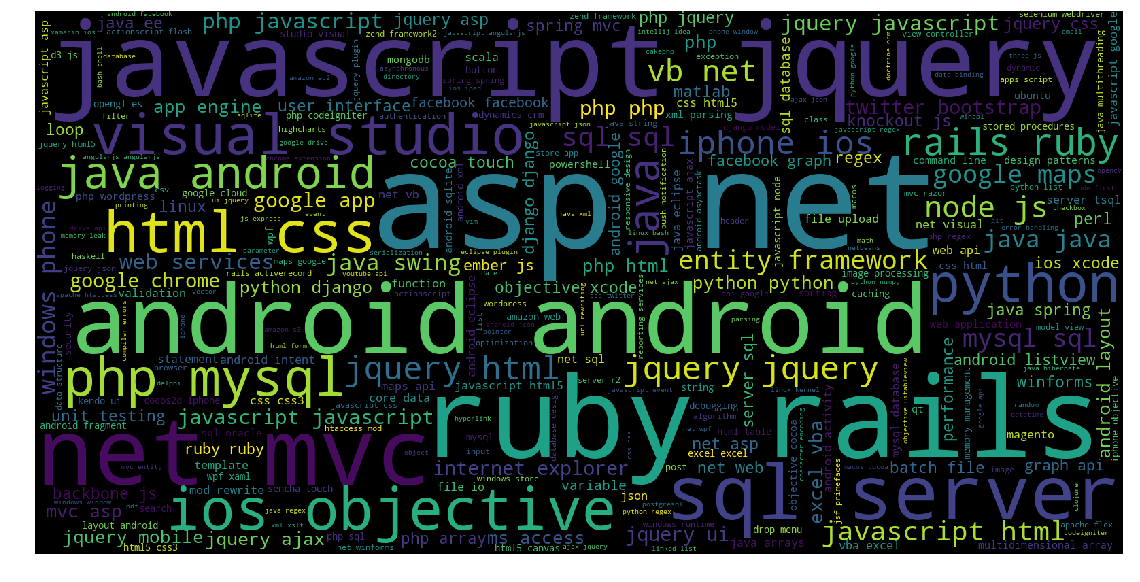

In [12]:
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=200,
                            width=1600,
                            height=800,
                            max_words=300,
                            relative_scaling=.5).generate(tags)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.savefig('stackOverflow.png')
plt.imshow(cloud);

## **Reformatting the column type**
   * Changing the datatype of the column **'_year_'** in the dataframe to **'_numeric_'** type

In [13]:
pd.to_numeric(PostsCount['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

## **Reshaping the columns**
   * Storing reshaped columns of the dataframe in new variables

In [14]:
year=PostsCount['year'].values.reshape(-1,1)
#print (year)
posts=PostsCount['posts'].values.reshape(-1,1)
#print (posts)

# **Linear Regression**
   * Performing Linear Regression to predict future values using the past data
   * Creating the model

In [15]:
reg = LinearRegression()

## **Train and Test Data**
   * Splitting the data into train and test using '*train_test_split()*' method

In [16]:
X_train, X_test, y_train, y_test = train_test_split(year,posts,test_size=0.2,shuffle=False)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

## **Fitting and Predicting**
   * Training the model using the training data and then using it to predict the values for the test data 

In [17]:
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [18]:
print('Predicted values\n',predictions)

Predicted values
 [[9.11584431e+13]
 [1.03893188e+14]]


# **Visualisations**
   * Visualising the training data and the test data and the predictions for better understanding

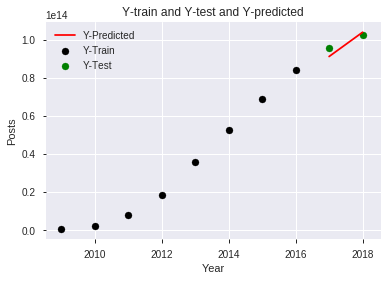

In [19]:
plt.scatter(X_train,y_train, color = "black")
plt.scatter(X_test, y_test, color = "green")
plt.plot(X_test, predictions, color = "red")
plt.gca().legend(('Y-Predicted','Y-Train', 'Y-Test'))
plt.title('Y-train and Y-test and Y-predicted')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

   * Visualising only the test values and the predicted values to check the accuracy of the model

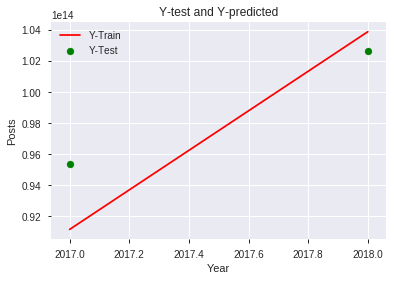

In [20]:
plt.scatter(X_test, y_test, color = "green")
plt.plot(X_test, predictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Y-test and Y-predicted')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

# **Model Accuracy Score and Error**
* Finding the score of the model for this data
* Finding the mean squared error and root mean squared error

In [21]:
reg.score(X_test,y_test)

0.27923821420908257

In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))

Mean Squared Error: 9.611303240361987e+24


In [23]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error: 3100210192932.4062


# **TECHNOLOGIES DISCUSSED**:

# **WEB DEVELOPMENT**
   * Finding the percentage of Web Development posts with respect to total posts each year

In [24]:
#angularjs,bootstrap,php,html,javascript,css
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and (tags like '%bootstrap%' or 
        tags like '%angularjs%' or tags like '%php%' or tags like '%html%' or tags like '%javascript%' or tags like '%css%')
        group by year
        order by year
        """

WebDev_Posts = stackoverflow.query_to_pandas(query)
WebDev_Posts['posts']= WebDev_Posts['posts']*100/PostsCount.posts
WebDev_Posts

,year,posts
0,2009,14.799058
1,2010,17.036856
2,2011,19.276332
3,2012,20.557690
4,2013,22.839008
5,2014,24.517801
6,2015,24.681437
7,2016,24.199212
8,2017,22.746055
9,2018,19.759909


In [25]:
WebDev_Posts.describe()

,year,posts
count,10.00000,10.000000
mean,2013.50000,21.041336
std,3.02765,3.357233
min,2009.00000,14.799058
25%,2011.25000,19.397226
50%,2013.50000,21.651873
75%,2015.75000,23.859161
max,2018.00000,24.681437


## **Reformatting the columns and Reshaping**
   * Changing the datatype of the **'_year_'** column to **'_numeric_'** type
   * Storing the reshaped columns of the dataframe in new variables

In [26]:
pd.to_numeric(WebDev_Posts['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

In [27]:
WebDevYear=WebDev_Posts['year'].values.reshape(-1,1)
#print (WebDevYear)
WebDevPosts=WebDev_Posts['posts'].values.reshape(-1,1)
#print (WebDevPosts)

## **Train data and Test data**
   * Splitting the data into train and test using '*train_test_split()*' method

In [28]:
XWebDev_train, XWebDev_test, yWebDev_train, yWebDev_test = train_test_split(WebDevYear,WebDevPosts,test_size=0.2,shuffle=False)
# print(XWebDev_train)
# print(XWebDev_test)
# print(yWebDev_train)
# print(yWebDev_test)

## **Linear Regression Model and  Prediction**

In [29]:
WebDevReg=LinearRegression()
WebDevReg.fit(XWebDev_train,yWebDev_train)
WebDevPredictions = WebDevReg.predict(XWebDev_test)
print('Predicted Values:\n',WebDevPredictions)

Predicted Values:
 [[27.52573024]
 [28.97846486]]


## **Visualisations**
   * Visualising the training data and the test data and the predictions for better understanding

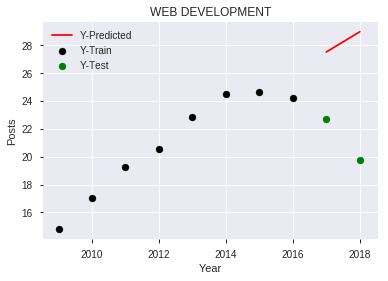

In [30]:
plt.scatter(XWebDev_train,yWebDev_train, color = "black")
plt.scatter(XWebDev_test, yWebDev_test, color = "green")
plt.plot(XWebDev_test, WebDevPredictions, color = "red")
plt.gca().legend(('Y-Predicted','Y-Train', 'Y-Test'))
plt.title('WEB DEVELOPMENT')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

   * Visualising the test values and the predicted values to check the accuracy of the model

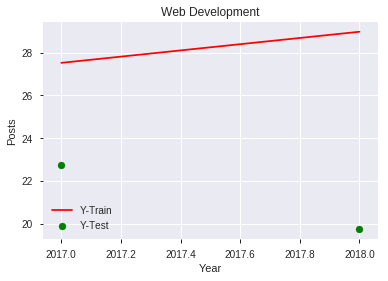

In [31]:
plt.scatter(XWebDev_test, yWebDev_test, color = "green")
plt.plot(XWebDev_test, WebDevPredictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Web Development')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

## **Model Accuracy Score and Error**

In [32]:
WebDevReg.score(XWebDev_test,yWebDev_test)

-23.184433465600087

In [33]:
print('Mean Squared Error:',metrics.mean_squared_error(yWebDev_test, WebDevPredictions))

Mean Squared Error: 53.913532139350465


In [34]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yWebDev_test, WebDevPredictions)))

Root Mean Squared Error: 7.342583478541491


# **1) AngularJS**
   * Finding the percentage of AngularJS posts with respect to total posts each year

In [35]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%angularjs%'
        group by year
        order by year
        """

AngularJSPosts = stackoverflow.query_to_pandas(query)
AngularJSPosts['posts']= AngularJSPosts['posts']*100/PostsCount.posts
AngularJSPosts

,year,posts
0,2009,0.000375
1,2011,0.003763
2,2012,0.244094
3,2013,1.753212
4,2014,3.179771
5,2015,4.072745
6,2016,3.718126
7,2017,2.011267
8,2018,0.783614


# **2) BootStrap**
   * Finding the percentage of BootStrap posts with respect to total posts each year

In [36]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%bootstrap%'
        group by year
        order by year
        """

BootstrapPosts = stackoverflow.query_to_pandas(query)
BootstrapPosts['posts']= BootstrapPosts['posts']*100/PostsCount.posts
pd.to_numeric(BootstrapPosts['year'])
BootstrapPosts

,year,posts
0,2009,0.016152
1,2010,0.015324
2,2011,0.027895
3,2012,0.299375
4,2013,0.675622
5,2014,1.005699
6,2015,1.134699
7,2016,1.093198
8,2017,0.997604
9,2018,0.809133


# **3) PHP**
   * Finding the percentage of PHP posts with respect to total posts each year

In [37]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%php%'
        group by year
        order by year
        """

PHPPosts = stackoverflow.query_to_pandas(query)
PHPPosts['posts']= PHPPosts['posts']*100/PostsCount.posts
pd.to_numeric(PHPPosts['year'])
PHPPosts

,year,posts
0,2009,6.525575
1,2010,7.727983
2,2011,8.360883
3,2012,8.428260
4,2013,8.549116
5,2014,8.592953
6,2015,8.050924
7,2016,7.582396
8,2017,6.923435
9,2018,5.580418


# **4) HTML**
   * Finding the percentage of HTML posts with respect to total posts each year

In [38]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%html%'
        group by year
        order by year
        """

htmlPosts = stackoverflow.query_to_pandas(query)
htmlPosts['posts']= htmlPosts['posts']*100/PostsCount.posts
pd.to_numeric(htmlPosts['year'])
htmlPosts

,year,posts
0,2009,3.173716
1,2010,3.740913
2,2011,4.402461
3,2012,5.039372
4,2013,5.990436
5,2014,6.507428
6,2015,6.299712
7,2016,6.022595
8,2017,5.784994
9,2018,4.853881


# **5) JavaScript**
   * Finding the percentage of JavaScript posts with respect to total posts each year

In [39]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%javascript%'
        group by year
        order by year
        """

JavaScriptPosts = stackoverflow.query_to_pandas(query)
JavaScriptPosts['posts']= JavaScriptPosts['posts']*100/PostsCount.posts
pd.to_numeric(JavaScriptPosts['year'])
JavaScriptPosts

,year,posts
0,2009,5.596910
1,2010,6.395492
2,2011,7.706441
3,2012,8.448292
4,2013,9.725935
5,2014,11.014401
6,2015,11.662546
7,2016,11.992194
8,2017,11.789585
9,2018,10.857628


# **6) CSS**
   * Finding the percentage of CSS posts with respect to total posts each year

In [40]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%css%'
        group by year
        order by year
        """

CSSPosts = stackoverflow.query_to_pandas(query)
CSSPosts['posts']= CSSPosts['posts']*100/PostsCount.posts
pd.to_numeric(CSSPosts['year'])
CSSPosts

,year,posts
0,2009,2.102401
1,2010,2.326871
2,2011,2.813660
3,2012,3.196851
4,2013,3.875376
5,2014,4.236905
6,2015,4.062043
7,2016,3.842350
8,2017,3.713456
9,2018,3.050499


# **Comparisons: WebDev**
   * Comparing the popularities of the various categories under Web Development

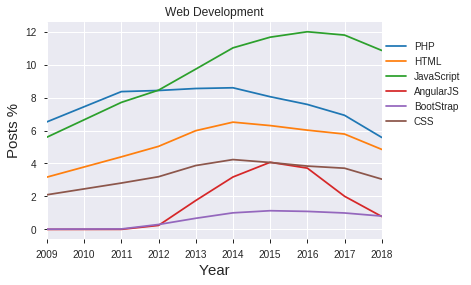

In [41]:
WebDev= pd.merge(PHPPosts, htmlPosts, how='inner', on = 'year')
WebDev=WebDev.set_index('year')
WebDev= pd.merge(WebDev, JavaScriptPosts, how='inner', on = 'year')
WebDev =WebDev.set_index('year')
WebDev=pd.merge(WebDev,AngularJSPosts,how='inner',on='year')
WebDev = WebDev.set_index('year')
WebDev=pd.merge(WebDev,BootstrapPosts,how='inner',on='year')
WebDev = WebDev.set_index('year')
WebDev=pd.merge(WebDev,CSSPosts,how='inner',on='year')
WebDev = WebDev.set_index('year')

WebDev.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Web Development')
plt.legend(['PHP','HTML','JavaScript','AngularJS','BootStrap','CSS'],loc=[1.0,0.5])
plt.show()

# **DATABASE TECHNOLOGIES**
  * Finding the percentage of Database Technologies posts with respect to total posts each year

In [42]:
#mysql,mongodb,nosql,postgresql,cassandra
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date)>= 2009 and extract(year from creation_date) < 2019 
        and (tags like '%mysql%' or tags like '%nosql%' or tags like '%mongodb%' 
        or tags like '%postgresql%' or tags like '%cassandra%')
        group by year
        order by year
        """

DataBase_Posts = stackoverflow.query_to_pandas(query)
DataBase_Posts['posts']= DataBase_Posts['posts']*100/PostsCount.posts
DataBase_Posts

,year,posts
0,2009,3.189790
1,2010,3.673525
2,2011,4.167828
3,2012,4.470733
4,2013,4.738175
5,2014,5.028950
6,2015,5.017064
7,2016,4.964659
8,2017,4.800209
9,2018,4.376063


In [43]:
DataBase_Posts.describe()

,year,posts
count,10.00000,10.000000
mean,2013.50000,4.442700
std,3.02765,0.614938
min,2009.00000,3.189790
25%,2011.25000,4.219887
50%,2013.50000,4.604454
75%,2015.75000,4.923546
max,2018.00000,5.028950


## **Reformatting the columns and Reshaping**
  * Changing the datatype of the **'_year_'** column to **'_numeric_'** type
  * Storing the reshaped columns of the dataframe in new variables

In [44]:
pd.to_numeric(DataBase_Posts['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

In [45]:
DataBaseYear=DataBase_Posts['year'].values.reshape(-1,1)
# print (DataBaseYear)
DataBasePosts=DataBase_Posts['posts'].values.reshape(-1,1)
# print (DataBasePosts)

## **Train data and Test data**
   * Splitting the data into train and test using *'train_test_split()'* method

In [46]:
XDataBase_train, XDataBase_test, yDataBase_train, yDataBase_test = train_test_split(DataBaseYear,DataBasePosts,test_size=0.2,shuffle=False)
# print(XDataBase_train)
# print(XDataBase_test)
# print(yDataBase_train)
# print(yDataBase_test)

## **Linear Regression Model and Prediction**

In [47]:
DataBaseReg=LinearRegression()
DataBaseReg.fit(XDataBase_train,yDataBase_train)
DataBasePredictions = DataBaseReg.predict(XDataBase_test)
print('Predicted Values:\n',DataBasePredictions)

Predicted Values:
 [[5.58451446]
 [5.84633088]]


## **Visualisations**
   * Visualising the training data and the test data and the predictions for better understanding

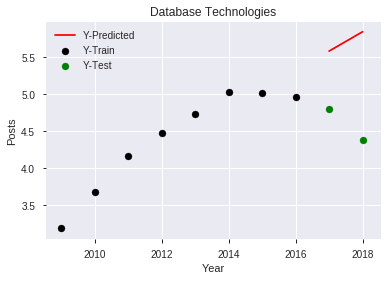

In [48]:
plt.scatter(XDataBase_train,yDataBase_train, color = "black")
plt.scatter(XDataBase_test, yDataBase_test, color = "green")
plt.plot(XDataBase_test, DataBasePredictions, color = "red")
plt.gca().legend(('Y-Predicted', 'Y-Train','Y-Test'))
plt.title('Database Technologies')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

  * Visualising the test values and the predicted values to check the accuracy of the model

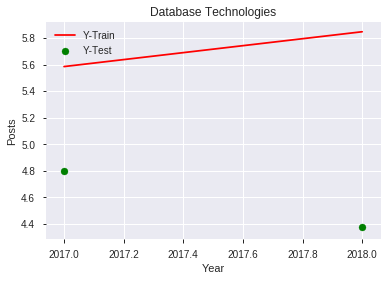

In [49]:
plt.scatter(XDataBase_test, yDataBase_test, color = "green")
plt.plot(XDataBase_test, DataBasePredictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Database Technologies')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

## **Model Accuracy Score and Error**

In [50]:
DataBaseReg.score(XDataBase_test, yDataBase_test)

-29.870801306529433

In [51]:
print('Mean Squared Error:', metrics.mean_squared_error(yDataBase_test, DataBasePredictions))

Mean Squared Error: 1.388410515510473


In [52]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yDataBase_test, DataBasePredictions)))

Root Mean Squared Error: 1.1783083278626494


# **1) MySQL**
   * Finding the percentage of MySQL posts with respect to total posts each year

In [53]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%mysql%'
        group by year
        order by year
        """

MySQLPosts = stackoverflow.query_to_pandas(query)
MySQLPosts['posts']= MySQLPosts['posts']*100/PostsCount.posts
pd.to_numeric(MySQLPosts['year'])
MySQLPosts

,year,posts
0,2009,2.894457
1,2010,3.144777
2,2011,3.461169
3,2012,3.559168
4,2013,3.683397
5,2014,3.763363
6,2015,3.512662
7,2016,3.286124
8,2017,3.101034
9,2018,2.590585


# **2) MongoDB**
   * Finding the percentage of MongoDB posts with respect to total posts each year

In [54]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%mongodb%'
        group by year
        order by year
        """

MongoDBPosts = stackoverflow.query_to_pandas(query)
MongoDBPosts['posts']= MongoDBPosts['posts']*100/PostsCount.posts
pd.to_numeric(MongoDBPosts['year'])
MongoDBPosts

,year,posts
0,2009,0.013821
1,2010,0.162032
2,2011,0.329736
3,2012,0.457556
4,2013,0.522332
5,2014,0.632051
6,2015,0.772958
7,2016,0.841206
8,2017,0.814479
9,2018,0.860954


# **3) NoSQL**
   * Finding the percentage of NoSQL posts with respect to total posts each year

In [55]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%nosql%'
        group by year
        order by year
        """

NoSQLPosts = stackoverflow.query_to_pandas(query)
NoSQLPosts['posts']= NoSQLPosts['posts']*100/PostsCount.posts
pd.to_numeric(NoSQLPosts['year'])
NoSQLPosts

,year,posts
0,2009,0.019369
1,2010,0.078278
2,2011,0.073311
3,2012,0.072625
4,2013,0.053358
5,2014,0.051542
6,2015,0.055282
7,2016,0.062418
8,2017,0.049748
9,2018,0.055820


# **4) PostgreSQL**
   * Finding the percentage of PostgreSQL posts with respect to total posts each year

In [56]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%postgresql%'
        group by year
        order by year
        """

PostgreSQLPosts = stackoverflow.query_to_pandas(query)
PostgreSQLPosts['posts']= PostgreSQLPosts['posts']*100/PostsCount.posts
pd.to_numeric(PostgreSQLPosts['year'])
PostgreSQLPosts

,year,posts
0,2009,0.294011
1,2010,0.324941
2,2011,0.331066
3,2012,0.386804
4,2013,0.445887
5,2014,0.536021
6,2015,0.607065
7,2016,0.682978
8,2017,0.755354
9,2018,0.798196


# **5) Cassandra**
  * Finding the percentage of Cassandra posts with respect to total posts each year

In [57]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 
        and tags like '%cassandra%'
        group by year
        order by year
        """

CassandraPosts = stackoverflow.query_to_pandas(query)
CassandraPosts['posts']= CassandraPosts['posts']*100/PostsCount.posts
pd.to_numeric(CassandraPosts['year'])
CassandraPosts

,year,posts
0,2009,0.005025
1,2010,0.035935
2,2011,0.042663
3,2012,0.055191
4,2013,0.080150
5,2014,0.096031
6,2015,0.122808
7,2016,0.147119
8,2017,0.123496
9,2018,0.117529


# **Comparisons: DataBase**
   * Comparing the popularities of the various categories under Database Technologies

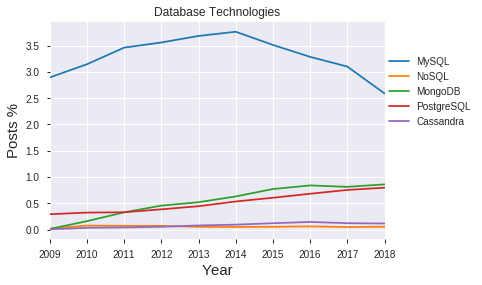

In [58]:
DataBase= pd.merge(MySQLPosts, NoSQLPosts, how='inner', on = 'year')
DataBase=DataBase.set_index('year')
DataBase= pd.merge(DataBase, MongoDBPosts, how='inner', on = 'year')
DataBase=DataBase.set_index('year')
DataBase= pd.merge(DataBase, PostgreSQLPosts, how='inner', on = 'year')
DataBase=DataBase.set_index('year')
DataBase= pd.merge(DataBase, CassandraPosts, how='inner', on = 'year')
DataBase=DataBase.set_index('year')


DataBase.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Database Technologies')
plt.legend(['MySQL','NoSQL','MongoDB','PostgreSQL','Cassandra'],loc=[1.0,0.5])
plt.show()

# **BIG DATA**
  * Finding the percentage of Big Data posts with respect to total posts each year

In [59]:
#hadoop,hive,spark,hbase,kafka
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date)>= 2009 and extract(year from creation_date) < 2019 and (tags like '%hadoop%' or 
        tags like '%spark%' or tags like '%hive%' or tags like '%hbase%' or tags like '%kafka%')
        group by year
        order by year
        """

BigData_Posts = stackoverflow.query_to_pandas(query)
BigData_Posts['posts']= BigData_Posts['posts']*100/PostsCount.posts
BigData_Posts

,year,posts
0,2009,0.075044
1,2010,0.099115
2,2011,0.155162
3,2012,0.247522
4,2013,0.330396
5,2014,0.460913
6,2015,0.785985
7,2016,1.084570
8,2017,1.168559
9,2018,1.288251


In [60]:
BigData_Posts.describe()

,year,posts
count,10.00000,10.000000
mean,2013.50000,0.569552
std,3.02765,0.471133
min,2009.00000,0.075044
25%,2011.25000,0.178252
50%,2013.50000,0.395654
75%,2015.75000,1.009924
max,2018.00000,1.288251


## **Reformatting the columns and Reshaping**
   * Changing the datatype of **'_year_'** column to **'_numeric_'** type
   * Storing the reshaped columns of the dataframe in new variables

In [61]:
pd.to_numeric(BigData_Posts['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

In [62]:
BigDataYear=BigData_Posts['year'].values.reshape(-1,1)
# print (BigDataYear)
BigDataPosts=BigData_Posts['posts'].values.reshape(-1,1)
# print (BigDataPosts)

## **Train data and Test data**
   * Splitting the data into train and test data using *'train_test_split()'* method

In [63]:
XBigData_train, XBigData_test, yBigData_train, yBigData_test = train_test_split(BigDataYear,BigDataPosts,test_size=0.2,shuffle=False)
# print(XBigData_train)
# print(XBigData_test)
# print(yBigData_train)
# print(yBigData_test)

## **Linear Regression Model and Prediction**

In [64]:
BigDataReg=LinearRegression()
BigDataReg.fit(XBigData_train,yBigData_train)
BigDataPredictions = BigDataReg.predict(XBigData_test)
print('Predicted Values:\n',BigDataPredictions)

Predicted Values:
 [[1.02097174]
 [1.15789029]]


## **Visualisations**
   * Visualising the training data and the test data and the predictions for better understanding

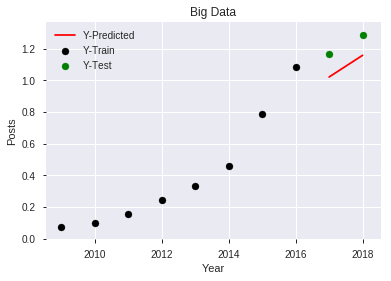

In [65]:
plt.scatter(XBigData_train,yBigData_train, color = "black")
plt.scatter(XBigData_test, yBigData_test, color = "green")
plt.plot(XBigData_test, BigDataPredictions, color = "red")
plt.gca().legend(('Y-Predicted', 'Y-Train','Y-Test'))
plt.title('Big Data')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

   * Visualising the test values and the predicted values to check the accuracy of the model

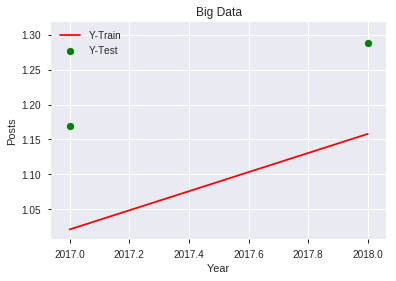

In [66]:
plt.scatter(XBigData_test, yBigData_test, color = "green")
plt.plot(XBigData_test, BigDataPredictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Big Data')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

## **Model Accuracy Score and Error**

In [67]:
BigDataReg.score(XBigData_test, yBigData_test)

-4.413281629586822

In [68]:
print('Mean Squared Error:', metrics.mean_squared_error(yBigData_test, BigDataPredictions))

Mean Squared Error: 0.01938785300499559


In [69]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yBigData_test, BigDataPredictions)))

Root Mean Squared Error: 0.13924027077320553


# **1) Hadoop**
   * Finding the percentage of Hadoop posts with respect to total posts each year

In [70]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%hadoop%'
        group by year
        order by year
        """

HadoopPosts = stackoverflow.query_to_pandas(query)
HadoopPosts['posts']= HadoopPosts['posts']*100/PostsCount.posts
pd.to_numeric(HadoopPosts['year'])
HadoopPosts

,year,posts
0,2009,0.023335
1,2010,0.046608
2,2011,0.091911
3,2012,0.168812
4,2013,0.244116
5,2014,0.295025
6,2015,0.342113
7,2016,0.312540
8,2017,0.270295
9,2018,0.202703


# **2) Hive**
   * Finding the percentage of Hive posts with respect to total posts each year

In [71]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%hive%'
        group by year
        order by year
        """

HivePosts = stackoverflow.query_to_pandas(query)
HivePosts['posts']= HivePosts['posts']*100/PostsCount.posts
pd.to_numeric(HivePosts['year'])
HivePosts

,year,posts
0,2009,0.029166
1,2010,0.027954
2,2011,0.035621
3,2012,0.051685
4,2013,0.071350
5,2014,0.096643
6,2015,0.129418
7,2016,0.159364
8,2017,0.178318
9,2018,0.181174


# **3) Spark**
   * Finding the percentage of Spark posts with respect to total posts each year

In [72]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%spark%'
        group by year
        order by year
        """

SparkPosts = stackoverflow.query_to_pandas(query)
SparkPosts['posts']= SparkPosts['posts']*100/PostsCount.posts
pd.to_numeric(SparkPosts['year'])
SparkPosts

,year,posts
0,2009,0.022043
1,2010,0.019640
2,2011,0.021061
3,2012,0.012967
4,2013,0.011908
5,2014,0.076792
6,2015,0.337820
7,2016,0.619569
8,2017,0.695149
9,2018,0.768225


# **4) HBase**
   * Finding the percentage of HBase posts with respect to total posts each year

In [73]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%hbase%'
        group by year
        order by year
        """

HBasePosts = stackoverflow.query_to_pandas(query)
HBasePosts['posts']= HBasePosts['posts']*100/PostsCount.posts
pd.to_numeric(HBasePosts['year'])
HBasePosts

,year,posts
0,2009,0.005186
1,2010,0.009810
2,2011,0.023312
3,2012,0.044768
4,2013,0.053214
5,2014,0.062895
6,2015,0.075441
7,2016,0.077729
8,2017,0.061140
9,2018,0.054683


# **5) Kafka**
   * Finding the percentage of Kafka posts with respect to total posts each year

In [74]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%kafka%'
        group by year
        order by year
        """

KafkaPosts = stackoverflow.query_to_pandas(query)
KafkaPosts['posts']= KafkaPosts['posts']*100/PostsCount.posts
pd.to_numeric(KafkaPosts['year'])
KafkaPosts

,year,posts
0,2011,0.001961
1,2012,0.006528
2,2013,0.020238
3,2014,0.039326
4,2015,0.087981
5,2016,0.170398
6,2017,0.220937
7,2018,0.311356


In [75]:
df = pd.DataFrame({"year":[2009,2010],"posts":[0,0]})
KafkaPosts = KafkaPosts.append(df, ignore_index = True)
KafkaPosts.sort_values("year", axis = 0, ascending = True, inplace = True)
KafkaPosts = KafkaPosts.reset_index(drop=True)
KafkaPosts

,year,posts
0,2009,0.000000
1,2010,0.000000
2,2011,0.001961
3,2012,0.006528
4,2013,0.020238
5,2014,0.039326
6,2015,0.087981
7,2016,0.170398
8,2017,0.220937
9,2018,0.311356


# **Comparisons: BigData**
   * Comparing the popularities of the various categories under Big Data

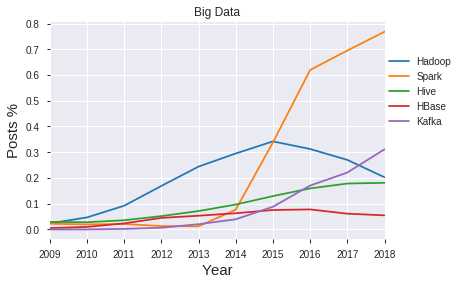

In [76]:
BigData= pd.merge(HadoopPosts, SparkPosts, how='inner', on = 'year')
BigData=BigData.set_index('year')
BigData= pd.merge(BigData, HivePosts, how='inner', on = 'year')
BigData=BigData.set_index('year')
BigData= pd.merge(BigData, HBasePosts, how='inner', on = 'year')
BigData=BigData.set_index('year')
BigData= pd.merge(BigData, KafkaPosts, how='inner', on = 'year')
BigData=BigData.set_index('year')

BigData.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Big Data')
plt.legend(['Hadoop','Spark','Hive','HBase','Kafka'],loc=[1.0,0.5])
plt.show()

# **DATA SCIENCE**
   * Finding the percentage of Data Science posts with respect to total posts each year

In [77]:
#pandas,matplotlib,regression,svm,kaggle
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date)>= 2009 and extract(year from creation_date) < 2019 
        and (tags like '%pandas%' or tags like '%matplotlib%'
        or tags like '%regression%' or tags like '%svm%' or tags like '%kaggle%')
        group by year
        order by year
        """

DataScience_Posts = stackoverflow.query_to_pandas(query)
DataScience_Posts['posts']= DataScience_Posts['posts']*100/PostsCount.posts
DataScience_Posts

,year,posts
0,2009,0.043144
1,2010,0.066552
2,2011,0.089433
3,2012,0.187156
4,2013,0.346750
5,2014,0.502046
6,2015,0.688799
7,2016,1.028511
8,2017,1.501202
9,2018,2.089581


In [78]:
DataScience_Posts.describe()

,year,posts
count,10.00000,10.000000
mean,2013.50000,0.654317
std,3.02765,0.690614
min,2009.00000,0.043144
25%,2011.25000,0.113864
50%,2013.50000,0.424398
75%,2015.75000,0.943583
max,2018.00000,2.089581


## **Reformatting the columns and Reshaping**
   * Changing the datatype of **'_year_'** column to **'_numeric_'** type
   * Storing the reshaped columns of the dataframe in new variables

In [79]:
pd.to_numeric(DataScience_Posts['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

In [80]:
DataScienceYear=DataScience_Posts['year'].values.reshape(-1,1)
# print (DataScienceYear)
DataSciencePosts=DataScience_Posts['posts'].values.reshape(-1,1)
# print (DataSciencePosts)

## **Train data and Test data**
   * Splitting the data into train and test using *'train_test_split()'* method

In [81]:
XDataScience_train, XDataScience_test, yDataScience_train, yDataScience_test = train_test_split(DataScienceYear,DataSciencePosts,test_size=0.2,shuffle=False)
# print(XDataScience_train)
# print(XDataScience_test)
# print(yDataScience_train)
# print(yDataScience_test)

## **Linear Regression Model and Prediction**

In [82]:
DataScienceReg=LinearRegression()
DataScienceReg.fit(XDataScience_train,yDataScience_train)
DataSciencePredictions = DataScienceReg.predict(XDataScience_test)
print('Predicted Values:\n',DataSciencePredictions)

Predicted Values:
 [[0.9800971 ]
 [1.11588558]]


## **Visualisations**
  * Visualising the training data and the test data and the predictions for better understanding

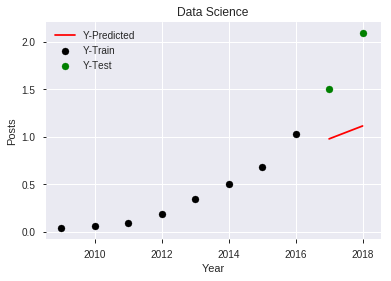

In [83]:
plt.scatter(XDataScience_train,yDataScience_train, color = "black")
plt.scatter(XDataScience_test, yDataScience_test, color = "green")
plt.plot(XDataScience_test, DataSciencePredictions, color = "red")
plt.gca().legend(('Y-Predicted', 'Y-Train','Y-Test'))
plt.title('Data Science')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

   * Visualising the test values and the predicted values to check the accuracy of the model

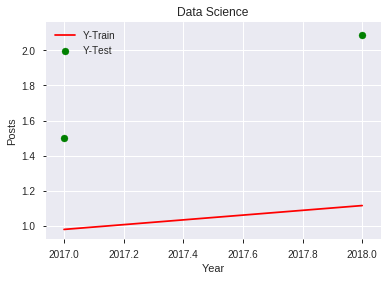

In [84]:
plt.scatter(XDataScience_test, yDataScience_test, color = "green")
plt.plot(XDataScience_test, DataSciencePredictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Data Science')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

## **Model Accuracy Score and Error**

In [85]:
DataScienceReg.score(XDataScience_test,yDataScience_test)

-6.04603433013026

In [86]:
print('Mean Squared Error:', metrics.mean_squared_error(yDataScience_test, DataSciencePredictions))

Mean Squared Error: 0.6098170688226715


In [87]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yDataScience_test, DataSciencePredictions)))

Root Mean Squared Error: 0.7809078491234875


# **1) Pandas**
   * Finding the percentage of Pandas posts with respect to total posts each year

In [88]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%pandas%'
        group by year
        order by year
        """

PandasPosts = stackoverflow.query_to_pandas(query)
PandasPosts['posts']= PandasPosts['posts']*100/PostsCount.posts
pd.to_numeric(PandasPosts['year'])
PandasPosts

,year,posts
0,2010,0.002491
1,2011,0.004129
2,2012,0.117325
3,2013,0.291453
4,2014,0.387308
5,2015,0.542427
6,2016,0.853381
7,2017,1.254006
8,2018,1.760446


In [89]:
df = pd.DataFrame({"year":[2009],"posts":[0]})
PandasPosts = PandasPosts.append(df, ignore_index = True)
PandasPosts.sort_values("year", axis = 0, ascending = True, inplace = True)
PandasPosts = PandasPosts.reset_index(drop=True)
PandasPosts

,year,posts
0,2009,0.000000
1,2010,0.002491
2,2011,0.004129
3,2012,0.117325
4,2013,0.291453
5,2014,0.387308
6,2015,0.542427
7,2016,0.853381
8,2017,1.254006
9,2018,1.760446


# **2) Matplotlib**
   * Finding the percentage of Matplotlib posts with respect to total posts each year

In [90]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%matplotlib%'
        group by year
        order by year
        """

MatplotlibPosts = stackoverflow.query_to_pandas(query)
MatplotlibPosts['posts']= MatplotlibPosts['posts']*100/PostsCount.posts
pd.to_numeric(MatplotlibPosts['year'])
MatplotlibPosts

,year,posts
0,2009,0.027022
1,2010,0.047513
2,2011,0.068811
3,2012,0.100384
4,2013,0.147627
5,2014,0.182915
6,2015,0.212972
7,2016,0.259247
8,2017,0.330211
9,2018,0.382832


# **3) Regression**
   * Finding the percentage of Regression posts with respect to total posts each year

In [91]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 
        and tags like '%regression%'
        group by year
        order by year
        """

RegressionPosts = stackoverflow.query_to_pandas(query)
RegressionPosts['posts']= RegressionPosts['posts']*100/PostsCount.posts
pd.to_numeric(RegressionPosts['year'])
RegressionPosts

,year,posts
0,2009,0.011547
1,2010,0.011755
2,2011,0.011157
3,2012,0.021787
4,2013,0.030397
5,2014,0.043386
6,2015,0.057166
7,2016,0.076566
8,2017,0.091897
9,2018,0.118008


# **4) SVM**
   * Finding the percentage of SVM posts with respect to total posts each year

In [92]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 
        and tags like '%svm%'
        group by year
        order by year
        """

SVMPosts = stackoverflow.query_to_pandas(query)
SVMPosts['posts']= SVMPosts['posts']*100/PostsCount.posts
pd.to_numeric(SVMPosts['year'])
SVMPosts

,year,posts
0,2009,0.004800
1,2010,0.007019
2,2011,0.008287
3,2012,0.018505
4,2013,0.026487
5,2014,0.027596
6,2015,0.029762
7,2016,0.030042
8,2017,0.027016
9,2018,0.025192


# **5) Kaggle**
   * Finding the percentage of Kaggle posts with respect to total posts each year

In [93]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 
        and tags like '%kaggle%'
        group by year
        order by year
        """

KagglePosts = stackoverflow.query_to_pandas(query)
KagglePosts['posts']= KagglePosts['posts']*100/PostsCount.posts
pd.to_numeric(KagglePosts['year'])
KagglePosts

,year,posts
0,2011,0.007716
1,2012,0.002628
2,2013,0.002571
3,2014,0.002866
4,2015,0.003495
5,2016,0.005285
6,2017,0.005728
7,2018,0.008223


In [94]:
df = pd.DataFrame({"year":[2009,2010],"posts":[0,0]})
KagglePosts = KagglePosts.append(df, ignore_index = True)
KagglePosts.sort_values("year", axis = 0, ascending = True, inplace = True)
KagglePosts = KagglePosts.reset_index(drop=True)
KagglePosts

,year,posts
0,2009,0.000000
1,2010,0.000000
2,2011,0.007716
3,2012,0.002628
4,2013,0.002571
5,2014,0.002866
6,2015,0.003495
7,2016,0.005285
8,2017,0.005728
9,2018,0.008223


# **Comparisons: DataScience**
   * Comparing the popularities of the various categories under Data Science

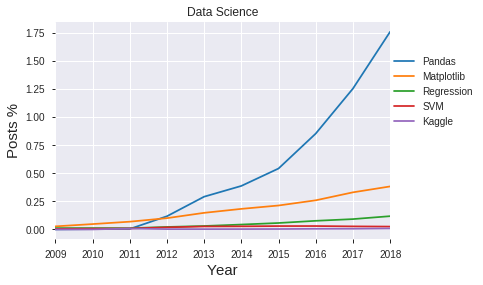

In [95]:
DataScience= pd.merge(PandasPosts, MatplotlibPosts, how='inner', on = 'year')
DataScience=DataScience.set_index('year')
DataScience= pd.merge(DataScience, RegressionPosts, how='inner', on = 'year')
DataScience=DataScience.set_index('year')
DataScience= pd.merge(DataScience, SVMPosts, how='inner', on = 'year')
DataScience=DataScience.set_index('year')
DataScience= pd.merge(DataScience, KagglePosts, how='inner', on = 'year')
DataScience=DataScience.set_index('year')

DataScience.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Data Science')
plt.legend(['Pandas','Matplotlib','Regression','SVM','Kaggle'],loc=[1.0,0.5])
plt.show()

# **PROGRAMMING LANGUAGES**
   * Finding the percentage of programming languages posts with respect to total posts each year

In [96]:
#C++,ruby,java,c#,python
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >= 2009 and extract(year from creation_date) < 2019 
        and (tags like '%c++%' or tags like '%python%' or tags like '%ruby%' 
        or tags like '%c#%' or (tags like '%java%' and tags not like '%javascript%'))
        group by year
        order by year
        """

ProgLang_Posts = stackoverflow.query_to_pandas(query)
ProgLang_Posts['posts']=ProgLang_Posts['posts']*100/PostsCount.posts
ProgLang_Posts

,year,posts
0,2009,31.580631
1,2010,30.971560
2,2011,29.697148
3,2012,29.302545
4,2013,30.046510
5,2014,30.351512
6,2015,29.850681
7,2016,29.124176
8,2017,29.195067
9,2018,29.460723


In [97]:
ProgLang_Posts.describe()

,year,posts
count,10.00000,10.000000
mean,2013.50000,29.958055
std,3.02765,0.806688
min,2009.00000,29.124176
25%,2011.25000,29.342089
50%,2013.50000,29.773914
75%,2015.75000,30.275261
max,2018.00000,31.580631


## **Reformatting the columns and Reshaping**
   * Changing the datatype of the **'_year_'** column to **'_numeric_'** type
   * Storing the reshaped columns of the dataframe in new variables

In [98]:
pd.to_numeric(ProgLang_Posts['year'])

0    2009
1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: year, dtype: int64

In [99]:
ProgLangYear=ProgLang_Posts['year'].values.reshape(-1,1)
# print (ProgLangYear)
ProgLangPosts=ProgLang_Posts['posts'].values.reshape(-1,1)
# print (ProgLangPosts)

## **Train data and Test data**
   * Splitting the data into train and test using *'train_test_split()* method

In [100]:
XProgLang_train, XProgLang_test, yProgLang_train, yProgLang_test = train_test_split(ProgLangYear,ProgLangPosts,test_size=0.2,shuffle=False)
# print(XProgLang_train)
# print(XProgLang_test)
# print(yProgLang_train)
# print(yProgLang_test)

## **Linear Regression Model and Prediction**

In [101]:
ProgLangReg=LinearRegression()
ProgLangReg.fit(XProgLang_train,yProgLang_train)
ProgLangPredictions = ProgLangReg.predict(XProgLang_test)
print('Predicted Values:\n',ProgLangPredictions)

Predicted Values:
 [[29.03921005]
 [28.80001333]]


## **Visualisations**
   * Visualising the training data and the testing data and the predictions for better understanding

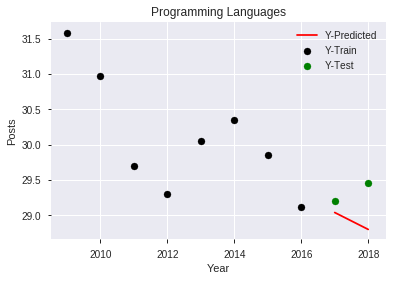

In [102]:
plt.scatter(XProgLang_train,yProgLang_train, color = "black")
plt.scatter(XProgLang_test, yProgLang_test, color = "green")
plt.plot(XProgLang_test, ProgLangPredictions, color = "red")
plt.gca().legend(('Y-Predicted', 'Y-Train','Y-Test'))
plt.title('Programming Languages')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

   * Visualising the test values and the predicted values to check the accuracy of the model

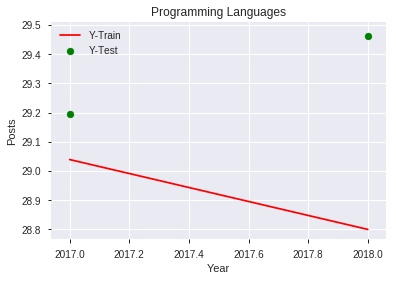

In [103]:
plt.scatter(XProgLang_test, yProgLang_test, color = "green")
plt.plot(XProgLang_test, ProgLangPredictions, color = "red")
plt.gca().legend(('Y-Train','Y-Test'))
plt.title('Programming Languages')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.show()

## **Model Accuracy Score and Error**

In [104]:
ProgLangReg.score(XProgLang_test, yProgLang_test)

-12.059601108806502

In [105]:
print('Mean Squared Error:', metrics.mean_squared_error(yProgLang_test, ProgLangPredictions))

Mean Squared Error: 0.23041404220891878


In [106]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yProgLang_test, ProgLangPredictions)))

Root Mean Squared Error: 0.480014627078091


# **1) C++**
   * Finding the percentage of C++ posts with respect to total posts each year

In [107]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%c++%'
        group by year
        order by year
        """

CplusPosts = stackoverflow.query_to_pandas(query)
CplusPosts['posts']= CplusPosts['posts']*100/PostsCount.posts
pd.to_numeric(CplusPosts['year'])
CplusPosts

,year,posts
0,2009,4.829722
1,2010,4.896718
2,2011,4.240572
3,2012,4.050184
4,2013,4.196298
5,2014,3.995631
6,2015,3.765012
7,2016,3.361997
8,2017,3.045559
9,2018,2.779438


# **2) Ruby**
   * Finding the percentage of Ruby posts with respect to total posts each year

In [108]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%ruby%'
        group by year
        order by year
        """

RubyPosts = stackoverflow.query_to_pandas(query)
RubyPosts['posts']= RubyPosts['posts']*100/PostsCount.posts
pd.to_numeric(RubyPosts['year'])
RubyPosts

,year,posts
0,2009,3.054221
1,2010,3.602850
2,2011,3.983963
3,2012,3.603258
4,2013,3.235894
5,2014,2.870755
6,2015,2.559477
7,2016,2.182383
8,2017,1.570202
9,2018,1.207115


# **3) Java**
   * Finding the percentage of Java posts with respect to total posts each year

In [109]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%java%' and tags not like '%javascript%'
        group by year
        order by year
        """

JavaPosts = stackoverflow.query_to_pandas(query)
JavaPosts['posts']= JavaPosts['posts']*100/PostsCount.posts
pd.to_numeric(JavaPosts['year'])
JavaPosts

,year,posts
0,2009,7.184148
1,2010,8.013954
2,2011,8.563514
3,2012,9.130705
4,2013,9.594460
5,2014,10.307231
6,2015,9.979268
7,2016,9.123802
8,2017,8.467271
9,2018,7.895666


# **4) C#**
   * Finding the percentage of C# posts with respect to total posts each year

In [110]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%c#%'
        group by year
        order by year
        """

CHashPosts = stackoverflow.query_to_pandas(query)
CHashPosts['posts']= CHashPosts['posts']*100/PostsCount.posts
pd.to_numeric(CHashPosts['year'])
CHashPosts

,year,posts
0,2009,13.196902
1,2010,11.018730
2,2011,9.682674
3,2012,8.718599
4,2013,8.275758
5,2014,7.670460
6,2015,7.091482
7,2016,6.799371
8,2017,6.231484
9,2018,5.654572


# **5) Python**
   * Finding the percentage of Python posts with respect to total posts each year

In [111]:
query = """select EXTRACT(year FROM creation_date) AS year, sum(id) as posts
        from `bigquery-public-data.stackoverflow.posts_questions`
        where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%python%'
        group by year
        order by year
        """

PythonPosts = stackoverflow.query_to_pandas(query)
PythonPosts['posts']= PythonPosts['posts']*100/PostsCount.posts
pd.to_numeric(PythonPosts['year'])
PythonPosts

,year,posts
0,2009,3.903014
1,2010,3.950507
2,2011,3.595468
3,2012,4.103332
4,2013,5.015321
5,2014,5.763404
6,2015,6.702766
7,2016,7.875749
8,2017,10.077870
9,2018,12.106027


# **Comparisons: ProgLang**
   * Comparing the popularities of the various categories under Programming Languages

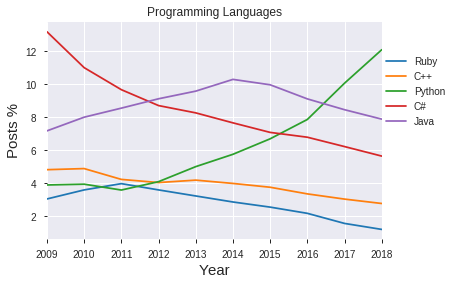

In [112]:
ProgLang= pd.merge(RubyPosts, CplusPosts, how='inner', on = 'year')
ProgLang =ProgLang.set_index('year')
ProgLang= pd.merge(ProgLang, PythonPosts, how='inner', on = 'year')
ProgLang =ProgLang.set_index('year')
ProgLang=pd.merge(ProgLang,CHashPosts,how='inner',on='year')
ProgLang = ProgLang.set_index('year')
ProgLang=pd.merge(ProgLang,JavaPosts,how='inner',on='year')
ProgLang = ProgLang.set_index('year')

ProgLang.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Programming Languages')
plt.legend(['Ruby','C++','Python','C#','Java'],loc=[1.0,0.5])
plt.show()

# **Past Trends Comparison**


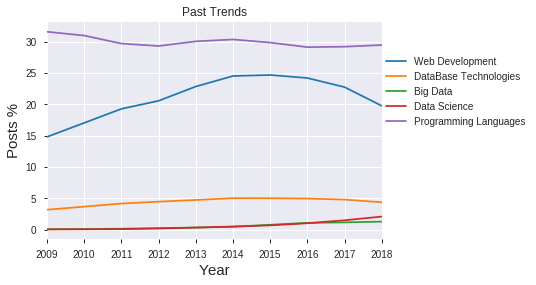

In [113]:
PastTrends= pd.merge(WebDev_Posts, DataBase_Posts, how='inner', on = 'year')
PastTrends =PastTrends.set_index('year')
PastTrends= pd.merge(PastTrends, BigData_Posts, how='inner', on = 'year')
PastTrends =PastTrends.set_index('year')
PastTrends=pd.merge(PastTrends,DataScience_Posts,how='inner',on='year')
PastTrends = PastTrends.set_index('year')
PastTrends=pd.merge(PastTrends,ProgLang_Posts,how='inner',on='year')
PastTrends = PastTrends.set_index('year')

PastTrends.plot(kind='line')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts %', fontsize=15)
y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.xticks(y_pos,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Past Trends')
plt.legend(['Web Development','DataBase Technologies','Big Data','Data Science','Programming Languages'],
           loc=[1.0,0.5])
plt.show()

# **Future Trends Comparison**
<p style='text-align: justify;'>The following function is used to create stacked graphs visualisations for any of the various technologies to compare the trends amongst them. The datasets for the technolgies or their sub categories can be passed as the parameter and these datasets can be variable in number starting from 2.</p> 
<p style='text-align: justify;'>The labels for the various technologies and the title for the visualisation can also be passed, but these fields are optional and are set to **None** and **'Trends in Technologies in 2019'** by default, respectively. *'Year'* can also be passed as a parameter to the function and the function predicts the trends for the passed year or 2019 as default.</p>

In [114]:
def trends(dfall, labels=None, Year = 2019, title="Trends in Technologies in ", **kwargs):

    plt.figure(figsize=(20,10))
   
    predict = []
    for df in dfall :
        year=df['year'].values.reshape(-1,1)
        posts=df['posts'].values.reshape(-1,1)
        reg=LinearRegression()
        X_train = year
        Y_train = posts
        X_test = [[Year]]
        reg.fit(X_train,Y_train)
        predictions = reg.predict(X_test)
        predict.append(predictions)

    trend = pd.DataFrame(columns = ['Technology','Posts %'])
    trend['Technology'] = labels
    trend['Posts %'] = predict
    
    x_pos = np.arange(len(trend['Technology']))
    plt.bar(x_pos,trend['Posts %'])
    plt.xticks(x_pos, trend['Technology'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Technologies',fontsize=20)
    plt.ylabel('Posts Percentage',fontsize=20)
    plt.title(title+str(Year),fontsize=30)
    plt.show()

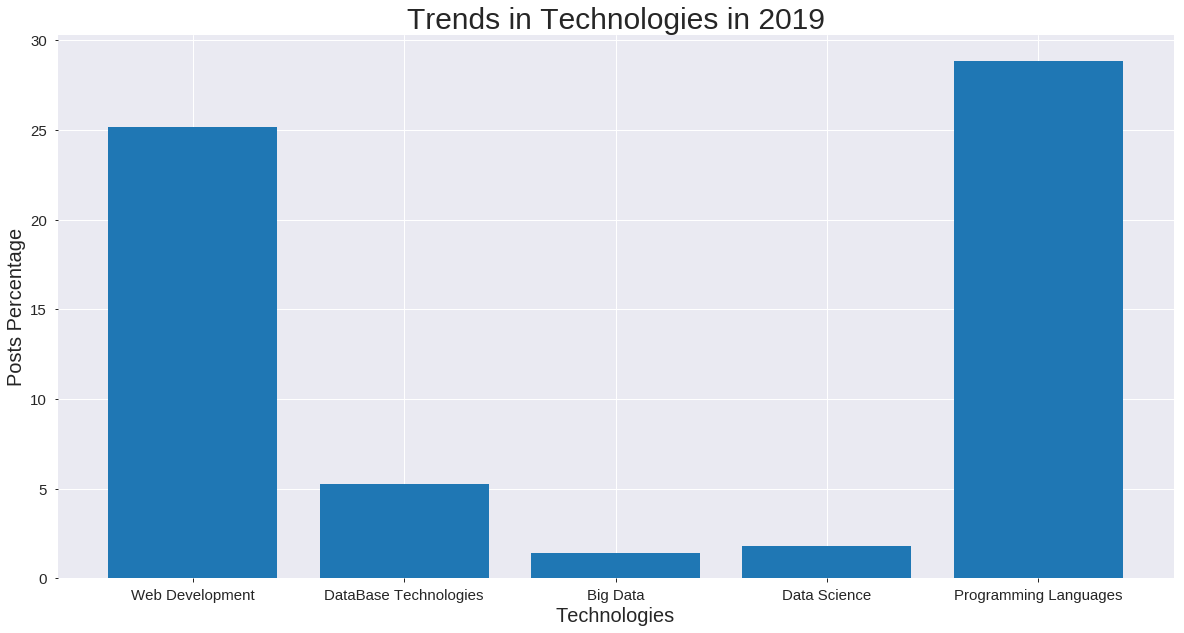

In [115]:
trends([WebDev_Posts, DataBase_Posts, BigData_Posts, DataScience_Posts, ProgLang_Posts],
       ["Web Development",'DataBase Technologies','Big Data','Data Science','Programming Languages'])

# **Generalized evaluator for technologies**
<p style='text-align: justify;'>This function takes in a list of tags for which the user wants to find the past trends. These tags are queried within the function to get the past data for each tag and these are merged into one datframe with each column as one tag. This dataframe is then used to plot a line graph which shows the past trends in the technologies mentioned as the tags list.</p>
<p style='text-align: justify;'>The function can also take optional parameters, namely labels and title. *'title'* is set to **'Trends in Technologies in 2019'** as default, while labels is equal to the list of tags if not mentioned explicitly.</p>

In [116]:
def PastTrends(dfall, labels = None, title="Past Trends", **kwargs):

    query1 = "select EXTRACT(year FROM creation_date) AS year, sum(id) as posts from `bigquery-public-data.stackoverflow.posts_questions` where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%"
    query3 ="%' group by year order by year"
    df = []
    
    if labels==None:
        labels = dfall
        
    l = len(dfall)
    for i in range(l):
        query2 = dfall[i]
        query = query1+query2+query3
        Posts = stackoverflow.query_to_pandas(query)
        Posts['posts']= Posts['posts']*100/PostsCount.posts
        pd.to_numeric(Posts['year'])
        df.append(Posts)
    
    trend = pd.merge(df[0], df[1], how='inner', on = 'year')
    trend = trend.set_index('year')
    if(l>2):
        for i in range(2,l):
            trend = pd.merge(trend, df[i], how='inner', on = 'year')
            trend = trend.set_index('year')
            
    trend.plot(kind='line')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Posts %', fontsize=15)
    y_pos=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
    plt.xticks(y_pos,fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(title)
    plt.legend(labels, loc=[1.0,0.5])
    plt.show()

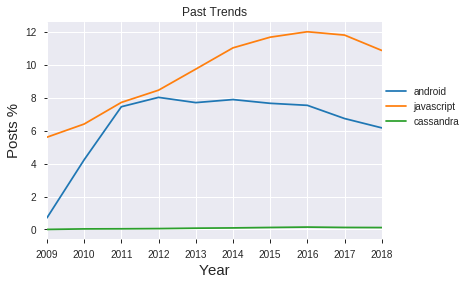

In [117]:
PastTrends(["android","javascript","cassandra"])

# **Generalized predictor for technologies**
<p style='text-align: justify;'>This function takes in a list of tags for which the user wants to find the future trends. These tags are queried within the function to get the past data for each tag and a linear regression model is built for each of the tags and future predictions are made using the queried past data and a bar graph is created which shows the predicted future trends in 2019 for the given tags.</p>
<p style='text-align: justify;'>The function can also take optional parameters, namely labels and title. *'title'* is set to **'Trends in Technologies in 2019'** as default, while labels is equal to the list of tags if not mentioned explicitly. The function can also take *'year'* as one of the arguments, which controls the year for which predictions are made. By default, *'year'* is set to 2019.</p>

In [118]:
def FutureTrends(dfall, Year = 2019, labels = None, title="Trends in Technologies in ", **kwargs):

    plt.figure(figsize=(20,10))
    
    query1 = "select EXTRACT(year FROM creation_date) AS year, sum(id) as posts from `bigquery-public-data.stackoverflow.posts_questions` where extract(year from creation_date) >=2009 and extract(year from creation_date) < 2019 and tags like '%"
    query3 ="%' group by year order by year"
    df = []
    l = len(dfall)
    
    if (labels==None):
        labels = dfall
        
    for i in range(l):
        query2 = dfall[i]
        query = query1+query2+query3
        Posts = stackoverflow.query_to_pandas(query)
        Posts['posts']= Posts['posts']*100/PostsCount.posts
        pd.to_numeric(Posts['year'])
        df.append(Posts)
        
    predict = []
    for d in df:
        year=d['year'].values.reshape(-1,1)
        posts=d['posts'].values.reshape(-1,1)
        reg=LinearRegression()
        X_train = year
        Y_train = posts
        X_test = [[Year]]
        reg.fit(X_train,Y_train)
        predictions = reg.predict(X_test)
        predict.append(predictions)
    #print(predict)
    
    trend = pd.DataFrame(columns = ['Technology','Posts %'])
    trend['Technology'] = labels
    trend['Posts %'] = predict
    
    x_pos = np.arange(len(trend['Technology']))
    plt.bar(x_pos,trend['Posts %'])
    plt.xticks(x_pos, trend['Technology'],fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Technologies',fontsize=20)
    plt.ylabel('Posts Percentage',fontsize=20)
    plt.title(title+str(Year),fontsize=30)
    plt.show()

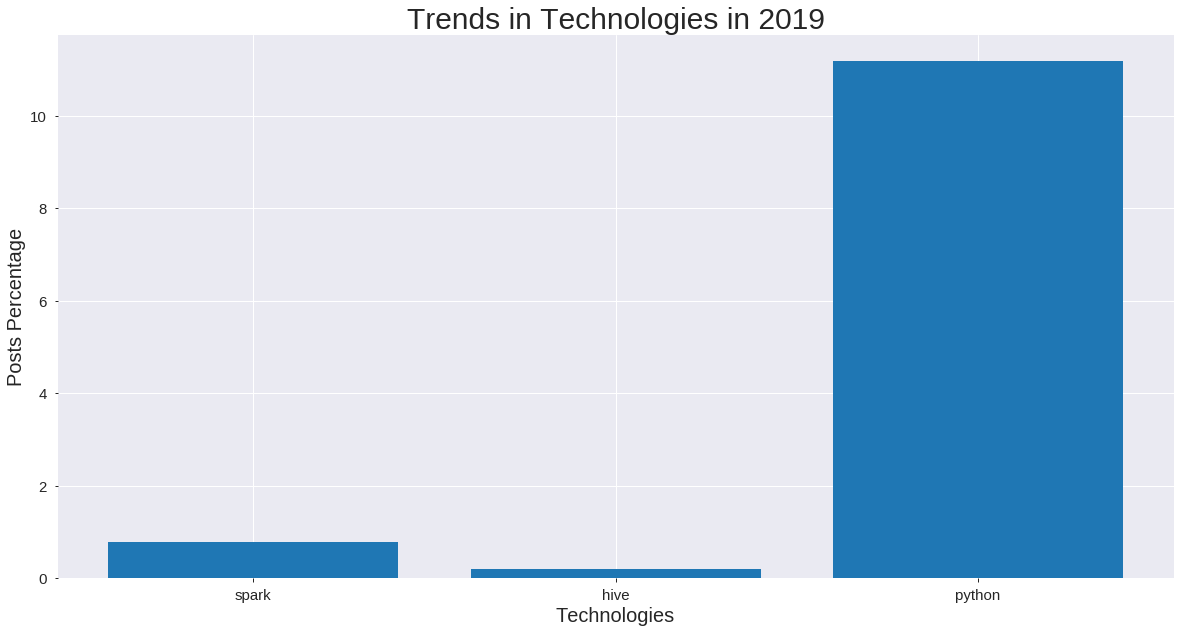

In [119]:
FutureTrends(["spark","hive","python"])

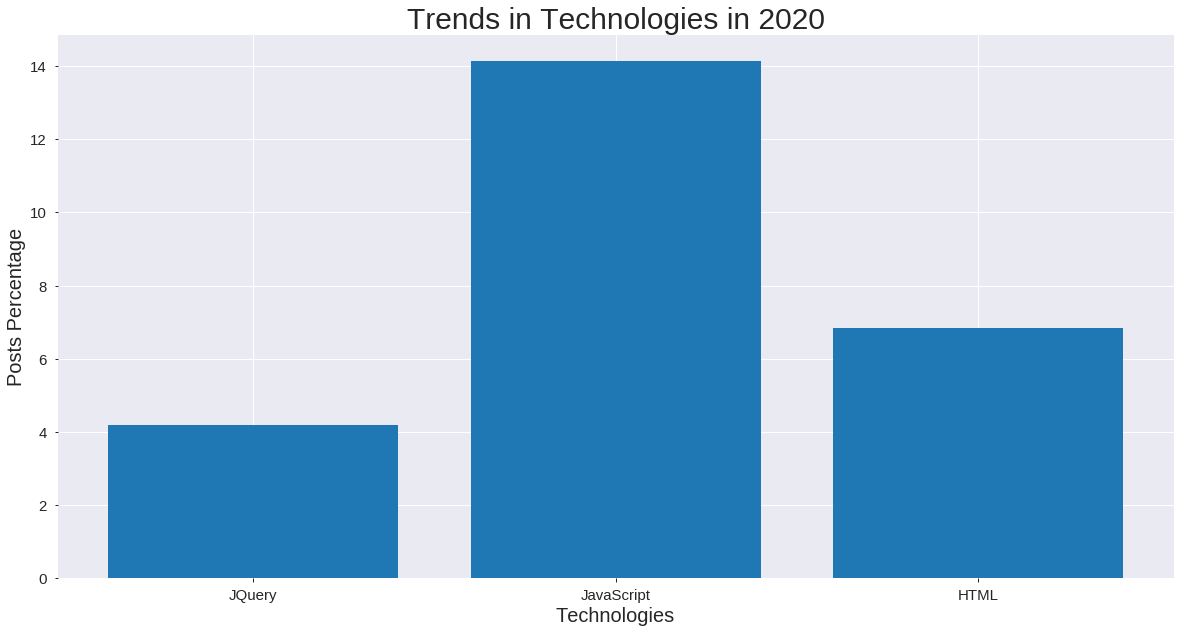

In [120]:
FutureTrends(["jquery","javascript","html"],2020, ['JQuery','JavaScript','HTML'])